The file below assumes that you are able to access the MCMC output from the 4 files (model0b.ipynb...model03.ipynb) run earlier.

These will have been placed in a working directory. However, it is assumed here that you might have moved these directories into one of your choice and therefore this needs to be modified.

## Set the directories to save output and read files

In [2]:
dirout='C:\\Users\\aes05kgb\\OneDrive - University of Reading\\k\\Art\\risk\\Jan 2025\\plots\\' #to save the plots
dr='D:\Kelvin\Kel1\Risk\Pystan\papersummary\\'  #For the MCMC output

In [3]:
import pickle
from shortercuts import *

In [4]:
def savemodel(sm,name):
    name=name+'.pkl'
    with open(name, 'wb') as f:
        pickle.dump(sm, f)
    return

#Load a model previously compiled by STAN, or run using STAN
def loadmodel(name):
    name=name+'.pkl'
    sm = pickle.load(open(name, 'rb'))
    return sm

a=r'$\alpha$';b=r'$\beta$';L=r'$\lambda$';
r=r'$\rho$';r1=r'$\rho_G$';r2=r'$\rho_L$';r3=r'$\rho_M$'
d1=r'$\delta_1$';d2=r'$\delta_2$'
g1=r'$\gamma_1$';g2=r'$\gamma_2$'
om1=r'$\omega_{1G}$';om2=r'$\omega_{2G}$';om3=r'$\omega_{1L}$';om4=r'$\omega_{2L}$'
pie1=r'$\pi_G$';pie2=r'$\pi_L$'
eta=r'$\eta$'

In [5]:
dr='D:\Kelvin\Kel1\Risk\Pystan\papersummary\\'  #This needs to be the directory where the MCMC is kept

z0b=loadmodel(dr+'model0bmcmc')
z1b=loadmodel(dr+'model1bmcmc')
z2b=loadmodel(dr+'model2bmcmc')
z3b=loadmodel(dr+'model3bmcmc')

In [6]:
lst=['alpha', 'beta', 'lamda', 'gama1', 'gama2','delta1', 'delta2']
lst_=[a, b, L,  g1, g2,d1, d2,]

scales='scale'
scales_=[r1,r2,r3]

omegas=['omega1','omega2','omega3','omega4']
omegas_=[om1,om2,om3,om4]

pies=['stbg','stbl']
pies_=[pie1,pie2]

etas='com'
etas_=eta

def pullmain(lst,lst_,scales,scales_,omegas='',omegas_='',pies='',pies_='',etas='',etas_='',z=''):
    dats=[]
    k=0
    for i in lst:
        dat=frame(z.get(i))
        dat.columns=[lst_[k]]
        dats+=[dat]
        k=k+1
    
    S=z.get(scales)
    for i in range(3):
        dat=frame(exp(S[:,i]))
        dat.columns=[scales_[i]]
        dats+=[dat]

    if omegas !='':
        j=0
        for i in omegas:
            dat=frame(z.get(i))
            dat.columns=[omegas_[j]]
            dats+=[dat]
            j=j+1

    if pies !='':
        j=0
        for i in pies:
            dat=frame(z.get(i))
            dat.columns=[pies_[j]]
            dats+=[dat]
            j=j+1
    
    if etas !='':
        dat=frame(z.get(i))
        dat.columns=[etas_]
        dats+=[dat]
    
    return dats
    

In [7]:
dats0b=pullmain(lst,lst_,scales,scales_,omegas    ='',     omegas_='',pies=''  ,pies_=''   ,etas='',etas_=''     ,z=z0b)
dats1b=pullmain(lst,lst_,scales,scales_,omegas=omegas,omegas_=omegas_,pies=''  ,pies_=''   ,etas='',etas_=''     ,z=z1b)
dats2b=pullmain(lst,lst_,scales,scales_,omegas=omegas,omegas_=omegas_,pies=''  ,pies_=''   ,etas='',etas_=''     ,z=z2b)
dats3b=pullmain(lst,lst_,scales,scales_,omegas=omegas,omegas_=omegas_,pies=pies,pies_=pies_,etas=etas,etas_=etas_,z=z3b)

dats0b[2]=exp(dats0b[2])
dats1b[2]=exp(dats1b[2])
dats2b[2]=exp(dats2b[2])
dats3b[2]=exp(dats3b[2])

In [8]:
import seaborn as sns

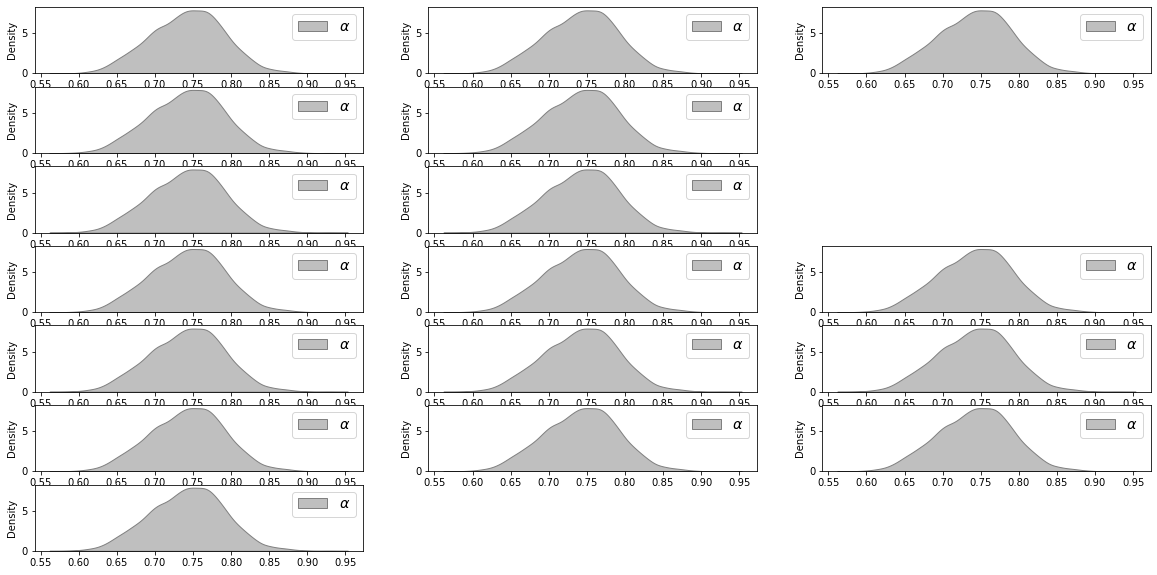

In [9]:
pltsize(10,20)
fig,ax=plt.subplots(7,3)

k=0
ii=0
for i in range(6):
    jj=0
    for j in range(4):
        if i==1 and j==2:
           ii=ii+1
           jj=0
        try:
            #sns.kdeplot(data=dats3[k], ax=ax[ii,jj], palette='gray', fill=True,alpha=.1)
            sns.kdeplot(data=dats3b[k], ax=ax[ii,jj], palette='gray', fill=True,alpha=.5)
            sns.kdeplot(data=dats3d[k], ax=ax[ii,jj], palette='gray', fill=True,alpha=.9)
            k=k+1
        except:
            pass
        jj=jj+1
    ii=ii+1

ax[1,2].remove()
ax[2,2].remove()
ax[6,1].remove()
ax[6,2].remove()


#plt.savefig(dirout+'FigHlog.png',facecolor=fig.get_facecolor()) # Unhash if to save


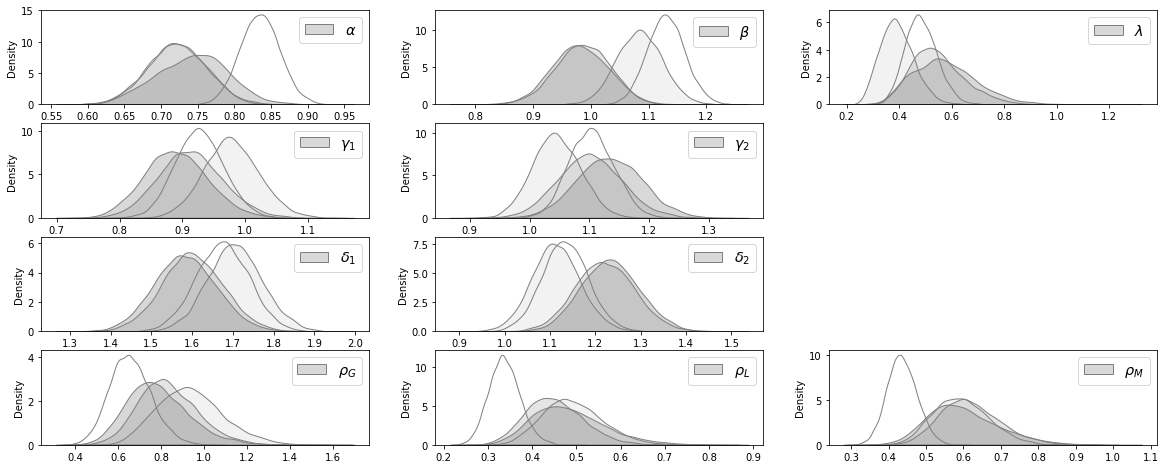

In [10]:
pltsize(8,20)
fig,ax=plt.subplots(4,3)

k=0
ii=0
for i in range(3):
    jj=0
    for j in range(4):
        if i==1 and j==2:
           ii=ii+1
           jj=0
        try:
            sns.kdeplot(data=dats0b[k], ax=ax[ii,jj], palette='gray', fill=True,alpha=.0)
            sns.kdeplot(data=dats1b[k], ax=ax[ii,jj], palette='gray', fill=True,alpha=.1)
            sns.kdeplot(data=dats2b[k], ax=ax[ii,jj], palette='gray', fill=True,alpha=.2)
            sns.kdeplot(data=dats3b[k], ax=ax[ii,jj], palette='gray', fill=True,alpha=.3)
            k=k+1
        except:
            pass
        jj=jj+1
    ii=ii+1

ax[1,2].remove()
ax[2,2].remove()


#plt.savefig(dirout+'FigA1.png',facecolor=fig.get_facecolor())  #Unhash if to save

## Convergence

0 0 3 0
1 1 3 0
2 3 3 0


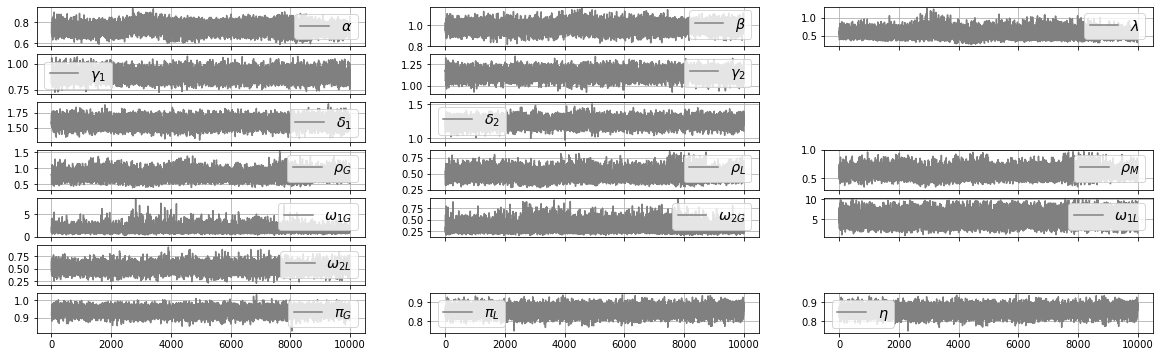

In [11]:
pltsize(6,20)
fig,ax=plt.subplots(7,3,sharex=True)

datsplot=dats3b

k=0
ii=0
for i in range(3):
    jj=0
    print(i,ii,j,jj)
    for j in range(4):
        if i==1 and j==2:
           ii=ii+1
           jj=0
        try:
            datsplot[k].plot(kind='line',ax=ax[ii,jj],grid=True,color='gray')
            k=k+1
        except:
            pass
        jj=jj+1
    ii=ii+1


for i in range(3):
    datsplot[10+i].plot(kind='line',ax=ax[4,i],grid=True,color='gray')
datsplot[10+3].plot(kind='line',ax=ax[5,0],grid=True,color='gray')

datsplot[10+4].plot(kind='line',ax=ax[6,0],grid=True,color='gray')
datsplot[10+5].plot(kind='line',ax=ax[6,1],grid=True,color='gray')
datsplot[10+6].plot(kind='line',ax=ax[6,2],grid=True,color='gray')


ax[1,2].remove()
ax[2,2].remove()
ax[5,1].remove()
ax[5,2].remove()


#plt.savefig(dirout+'FigA2.png',facecolor=fig.get_facecolor()) Unhash to save

In [12]:

def r_hat(sample,num_chains):
    num_samples=int(len(sample)/num_chains)
    samples=sample.reshape(num_chains,num_samples)
    # Assuming samples is a 2D array of shape (num_chains, num_samples)
    num_chains, num_samples = samples.shape
    
    # Calculate the within-chain variance
    W = np.mean(np.var(samples, axis=1, ddof=1))
    # Calculate the between-chain variance
    chain_means = np.mean(samples, axis=1)
    B = num_samples * np.var(chain_means, ddof=1)
    # Estimate the marginal posterior variance
    var_plus = ((num_samples ) / num_samples) * W + (1 / num_samples) * B
    # Calculate R-hat
    r_hat = np.sqrt(var_plus / W)
    return r_hat


def r_hat1(z,name,num_chains):
    rhats=[]
    shap=np.shape(z[name])
    #print(shap)
    x=z[name]
    rhats+=[name,r_hat(x,num_chains)]
    return rhats

def r_hat2(z,name,num_chains):
    rhats=[]
    shap=np.shape(z[name])
    #print(shap)
    for i in range(shap[1]):
            x=z[name][:,i]
            rhats+=[[name,i+1,r_hat(x,num_chains)]]
    return rhats

def r_hat3(z,name,num_chains):
    rhats=[]
    shap=np.shape(z[name])
    for i in range(shap[1]):
        for j in range(shap[2]):
            x=z[name][:,i,j]
            rhats+=[[name,i+1,j+1,r_hat(x,num_chains)]]
    return rhats


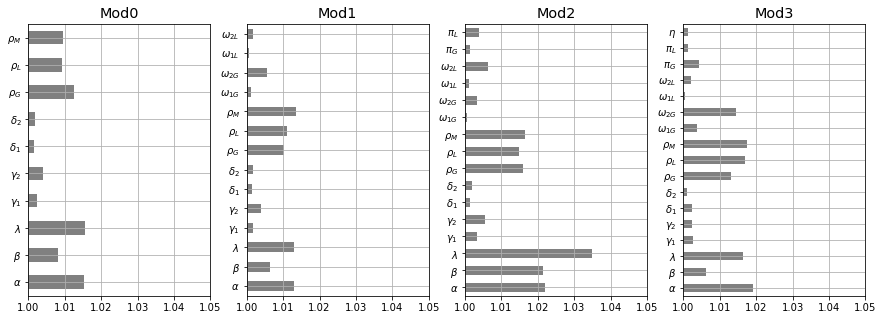

In [13]:
def rhatgraph(z,lst,lst_,scales,scales_,omegas='',omegas_='',pies='',pies_='',etas='',etas_=''):
    rh=[]
    j=0
    for i in lst:
        h=r_hat1(z,i,8)
        h[0]=lst_[j]
        rh+=[h]
        j=j+1
    
    rh2=r_hat2(z,scales,8)
    for i in range(3):
        x=[scales_[i]]
        v=[rh2[i][2]]
        rh+=[[x[0]]+[v[0]]]

    if omegas !='':
        j=0
        for i in omegas:
            h=r_hat1(z,i,8)
            h[0]=omegas_[j]
            rh+=[h]
            j=j+1

    if pies !='':
        j=0
        for i in pies:
            h=r_hat1(z,i,8)
            h[0]=pies_[j]
            rh+=[h]
            j=j+1

    if etas !='':
        h=r_hat1(z,i,8)
        h[0]=etas_
        rh+=[h]
        j=j+1
    
    rh=frame(rh)
    rh.index=rh[0]
    rh=rh.drop(0,axis=1)
    rh.index.name=''
    rh.columns=['rhat']
    return rh

rh0=rhatgraph(z0b,lst,lst_,scales,scales_)
rh1=rhatgraph(z1b,lst,lst_,scales,scales_,omegas,omegas_)
rh2=rhatgraph(z2b,lst,lst_,scales,scales_,omegas,omegas_,pies,pies_)
rh3=rhatgraph(z3b,lst,lst_,scales,scales_,omegas,omegas_,pies,pies_,etas,etas_)

pltsize(5,15)
fig,ax=plt.subplots(1,4)
rh0.plot(kind='barh',xlim=(1,1.05),grid=True,ax=ax[0],title='Mod0',legend=False,color='gray')
rh1.plot(kind='barh',xlim=(1,1.05),grid=True,ax=ax[1],title='Mod1',legend=False,color='gray')
rh2.plot(kind='barh',xlim=(1,1.05),grid=True,ax=ax[2],title='Mod2',legend=False,color='gray')
rh3.plot(kind='barh',xlim=(1,1.05),grid=True,ax=ax[3],title='Mod3',legend=False,color='gray')
plt.savefig(dirout+'FigA3.png',facecolor=fig.get_facecolor())